In [1]:
print('Лабораторна робота №2\n')
print('Варіант 6\n')
print('Виконали:\nБоровков Нікіта ФБ-02\nПошивак Назарій ФБ-02')

Лабораторна робота №2

Варіант 6

Виконали:
Боровков Нікіта ФБ-02
Пошивак Назарій ФБ-02


In [2]:
#Глобальні змінні, які будуть використовуватися у декількох функціях
KEY_LENGTHS_TASK1 = [2,3,4,5] + list(range(10, 21))

ALPHABET = [chr(i) for i in range(ord('а'), ord('я')+1)]

ALPHABET_LENGTH = len(ALPHABET)

RU_MOST_FREQUENT_LETTER = "о"

In [3]:
print('Алфавіт:\n', *ALPHABET)

Алфавіт:
 а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я


In [4]:
#зчитуємо текст з вихідного файлу. У нашому випадку це вірш Пушкіна "К молодой вдове"
#Також прибираємо з нього розділові знаки, пробіли і newline-и
import re
def read_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        txt = file.read()
        print('Вихідний текст:\n',txt)
        txt = re.sub(r'[^а-я]', '', txt.lower().replace('\n',' '))
        print('\nОброблений текст:\n', txt)
    return txt

cleartext_task1 = read_from_file('Desktop/labas/crypto/lab2_task1.txt')

Вихідний текст:
 Лида, друг мой неизменный,
Почему сквозь лёгкий сон
Часто, негой утомлённый,
Слышу я твой тихий стон?
Почему, в любви счастливой
Видя страшную мечту,
Взор недвижный, боязливый
Устремляешь в темноту?
Почему, когда вкушаю
Быстрый обморок любви,
Иногда я замечаю
Слезы тайные твои?
Ты рассеянно внимаешь
Речи пламенной моей,
Хладно руку пожимаешь,
Хладен взор твоих очей…
О бесценная подруга!
Вечно ль слезы проливать,
Вечно ль мертвого супруга
Из могилы вызывать?
Верь мне: узников могилы
Беспробуден хладный сон;
Им не мил уж голос милый,
Не прискорбен скорби стон;
Не для них — надгробны розы,
Сладость утра, шум пиров,
Откровенной дружбы слезы
И любовниц робкий зов…
Рано друг твой незабвенный
Вздохом смерти воздохнул
И, блаженством упоенный,
На груди твоей уснул.
Спит увенчанный счастливец;
Верь любви — невинны мы.
Нет, разгневанный ревнивец
Не придёт из вечной тьмы;
Тихой ночью гром не грянет,
И завистливая тень
Близ любовников не станет,
Вызывая спящий день.

Оброблений тек

In [5]:
#Функція для генерування ключів для 1-го завдання
import random

def gen_keys(chars):
    combinations = []
    for i in KEY_LENGTHS_TASK1:
        start = random.randint(0, len(chars) - i) if len(chars) > i else 0
        combinations.append("".join(chars[start:start+i]))
    print('\nКлючі:')
    print("{:<10} {:<10}".format("Довжина","Ключ"))
    for i,key in enumerate(combinations):
        print("{:<10} {:<10}".format(KEY_LENGTHS_TASK1[i], key))
    return combinations    

In [6]:
keys_task1 = gen_keys(ALPHABET)


Ключі:
Довжина    Ключ      
2          ст        
3          ийк       
4          бвгд      
5          ъыьэю     
10         ийклмнопрс
11         вгдежзийклм
12         жзийклмнопрс
13         жзийклмнопрст
14         туфхцчшщъыьэюя
15         опрстуфхцчшщъыь
16         ежзийклмнопрстуф
17         прстуфхцчшщъыьэюя
18         ийклмнопрстуфхцчшщ
19         клмнопрстуфхцчшщъыь
20         зийклмнопрстуфхцчшщъ


In [7]:
# Функція знаходження індексу відповідності
def coincidence_index(text):
    length = len(text)
    index = sum([text.count(i) * (text.count(i) - 1) for i in ALPHABET]) / (length * (length - 1))
    return index

In [8]:
# Функція для шифрування відкритого тексту шифром Віженера
def encrypt_vigenere(plaintext, key):
    ciphertxt = ""
    key_index = 0
    for char in plaintext:
        shift = ord(key[key_index % len(key)]) - ord('а')
        ciphertxt += chr((ord(char) + shift - ord('а')) % ALPHABET_LENGTH + ord('а'))
        key_index += 1
    return ciphertxt

In [9]:
#Знайдемо індекси відповідності до відкритого тексту і до кожного шифротексту (вихідний текст + ключ[i]) 
def get_indices(cleartext, keys):
    indices = []
    indices.append(coincidence_index(cleartext))
    for key in keys:
        ciphertext = encrypt_vigenere(cleartext, key)
        index = coincidence_index(ciphertext)
        indices.append(index)
        
    print('Індекси відповідності:')
    print("{:<10} {:<10}".format("Довжина ключа","Індекс відповідності"))
    print("{:<13} {:<10}".format("cleartext", indices[0]))
    for i, index in enumerate(indices[1:]):
        print("{:<13} {:<10}".format(KEY_LENGTHS_TASK1[i], index))
    keys_for_ciphering_lengths = ['cleartext']+[len(key) for key in keys]
    return keys_for_ciphering_lengths, indices

In [10]:
lengths_task1, indices_task1 = get_indices(cleartext_task1, keys_task1)

Індекси відповідності:
Довжина ключа Індекс відповідності
cleartext     0.050185971495342485
2             0.04214146999769593
3             0.04174319475988282
4             0.03916263454132517
5             0.038165300681346895
10            0.03533787564596294
11            0.035637404957045524
12            0.035528784437641944
13            0.03460057272637504
14            0.035541950561206015
15            0.035318126460616835
16            0.032885685132154965
17            0.033632862644415916
18            0.033441953852736905
19            0.03285606135413581
20            0.031815937592574305


In [11]:
#Функція для зображення індексів на графіку
import matplotlib.pyplot as plt
def plot(x, y):
    fig = plt.figure(figsize=(12,8), dpi=100)
    ax = fig.add_subplot(111)
    xx = range(len(x))
    width = 0.8
    ax.bar(xx, y, width, color='r', align='center')
    ax.set_xticks(xx)
    ax.set_xticklabels(x)

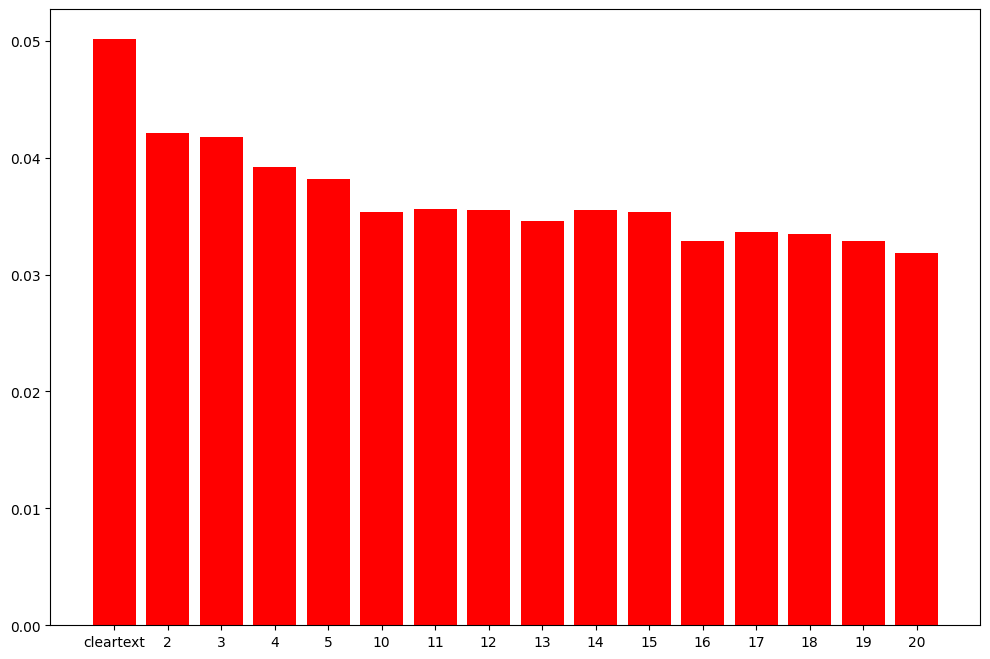

In [12]:
plot(lengths_task1, indices_task1)

In [13]:
#Функція для розшифрування шифротексту Віженером
def decipher_vigenere(ciphertext, key):
    import re
    ciphertext = re.sub(r'[^а-я]', '', ciphertext)
    key = re.sub(r'[^а-я]', '', key)
    plaintext = ""
    key_index = 0
    for char in ciphertext:
        shift = ord(key[key_index % len(key)]) - ord('а')
        plaintext += chr((ord(char) - shift - ord('а')) % ALPHABET_LENGTH + ord('а'))
        key_index += 1
    return plaintext

In [14]:
#Розшифруємо шифротекст наданий згідно варіанту (Варіант 6)
def task3(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        txt = file.read().replace("\n", "").replace(" ", "")
    key_lengths = [i+2 for i in range(40)]
    indices = []
    cd = {}
    for k in key_lengths:
        cd[k] = "".join(txt[::k])
    for ciphertext in cd.values():
        index = coincidence_index(ciphertext)
        indices.append(index)
            
    print('Індекси відповідності:')
    print("{:<10} {:<10}".format("Довжина ключа","Індекс відповідності"))
    for i, index in enumerate(indices):
        print("{:<13} {:<10}".format(i+2, index))
    
    return txt, key_lengths, indices

In [15]:
ciphertext_task3, keys_task3, indices_task3 = task3('Desktop/labas/crypto/lab2_task3.txt')

Індекси відповідності:
Довжина ключа Індекс відповідності
2             0.03416500708378283
3             0.034086615289694845
4             0.03456919799923844
5             0.033567059049018515
6             0.033878646079923025
7             0.034286478210101286
8             0.03493222390647662
9             0.034010367626517116
10            0.034172501117235216
11            0.03335174165045186
12            0.03415061295971979
13            0.03424903685814502
14            0.03373815783982305
15            0.03281315981419632
16            0.03430059037535673
17            0.0573299265410412
18            0.03441083022516922
19            0.03277931671283472
20            0.03578674577600464
21            0.03504624678711469
22            0.036235468711352956
23            0.03378302036020157
24            0.03273218010060115
25            0.03275381552753816
26            0.032751469063256135
27            0.03507516105941303
28            0.03405821344931415
29            0.0

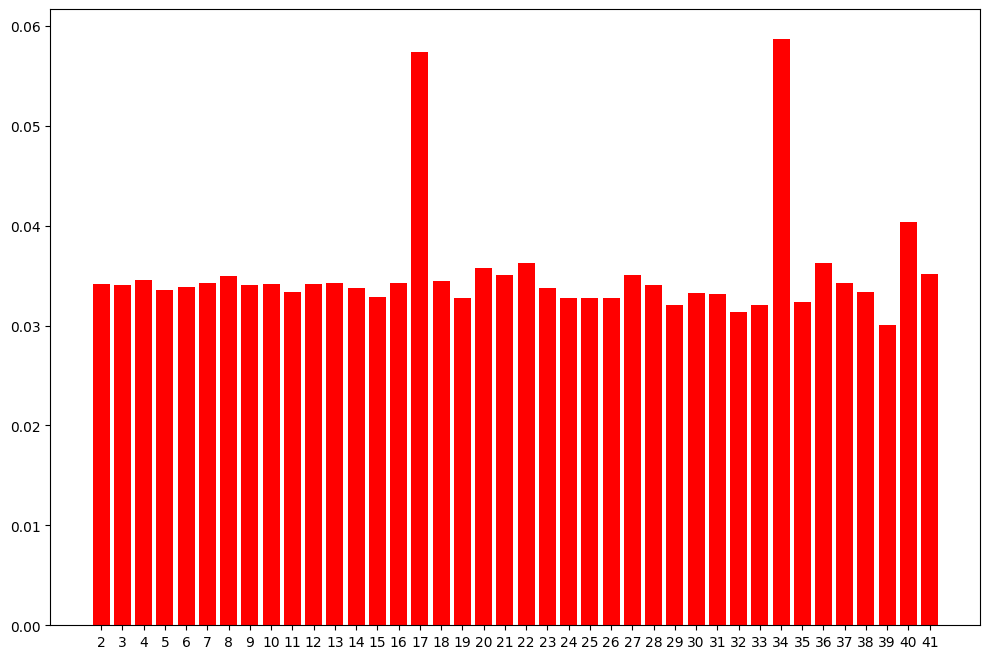

In [16]:
plot(keys_task3,indices_task3)

In [17]:
#Функція для знаходження підходящих ключів
def find_key_length(IC, threshold):
    max_ic = max(IC)
    key_lengths = []
    for i, ic_val in enumerate(IC):
        if ic_val + threshold >= max_ic:
            key_lengths.append(i+2)
    return key_lengths

In [20]:
#Функція для знаходження ключів
import operator

def guess_key(txt, key_length, depth):
    possible_keys = [""] * depth
    key_variables = ["".join(txt[k::key_length] for k in range(key_length))]

    for k in key_variables:
        letter_count = {}
        for letter in k:
            if letter in letter_count:
                letter_count[letter] += 1
            else:
                letter_count[letter] = 1

        sorted_chars = sorted(letter_count.keys(), key=letter_count.get, reverse=True)
        
        alphabet_index = {letter: index for index, letter in enumerate(ALPHABET)}
        for i in range(depth):
            idx = (alphabet_index[sorted_chars[i]] - alphabet_index[RU_MOST_FREQUENT_LETTER]) % len(ALPHABET)
            possible_keys[i] += ALPHABET[idx]

    return possible_keys

In [21]:
most_likely_keys_length = find_key_length(indices_task3, 0.01)
print(f'Довжина ключів з індексами відповідності, які перевищують теоретичні значення: {most_likely_keys_length}')
# print(f'Довжина найбільш підходящого ключа: {most_likely_keys_length[0]}')
possible_keys = guess_key(ciphertext_task3, most_likely_keys_length[0], 4)
print(f'Можливі ключі: {"; ".join(possible_keys)}')
print(f'Найбільш підходящий ключ: "{possible_keys[0]}"')

Довжина ключів з індексами відповідності, які перевищують теоретичні значення: [17, 34]
Можливі ключі: д; з; я; в
Найбільш підходящий ключ: "д"


In [ ]:
#Розшифруємо шифротекст ключем, який отримаємо у результаті перетину отриманих ключів
possible_key = 'возвращениеджинна'
answer_task3 = decipher_vigenere(ciphertext_task3, possible_key)
print(f'Шифротекст, розшифрований ключем "{possible_key}":\n{answer_task3}')